In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
%matplotlib inline
from scipy.stats import  f_oneway
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW as smstat
from PIL import Image

In [12]:
pwd

'C:\\Users\\User\\Python_in_MLandDS\\Project_3'

In [3]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'striatum')

In [14]:
pbr28

,Group_d7,SL,SR,Ratio,Unnamed: 4,Group_d21,SL.1,SR.1,ratio_21,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Vehicle,0.399617,0.741743,1.856137,NaN,Vehicle,0.462447,0.677736,1.465544,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vehicle,0.391154,0.749996,1.917392,NaN,Vehicle,0.321377,0.508003,1.580707,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vehicle,0.270607,0.419158,1.548956,NaN,Vehicle,0.389415,0.461842,1.185989,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vehicle,0.356515,0.446541,1.252517,NaN,Vehicle,0.375076,0.401584,1.070675,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vehicle,0.293043,0.396865,1.354292,NaN,Vehicle,0.359843,0.451437,1.254538,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Vehicle,0.313197,0.507404,1.620078,NaN,Vehicle,0.330377,0.427755,1.294749,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,KW6002,0.289606,0.375730,1.297383,NaN,Vehicle,0.313197,0.507404,1.620078,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,KW6002,0.357898,0.450595,1.259002,NaN,KW6002,0.389003,0.525805,1.351672,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,KW6002,0.379306,0.479595,1.264401,NaN,KW6002,0.404332,0.494010,1.221794,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KW6002,0.327849,0.374423,1.142058,NaN,KW6002,0.443464,0.497603,1.122082,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=8.761e-02 stat=1.860e+00


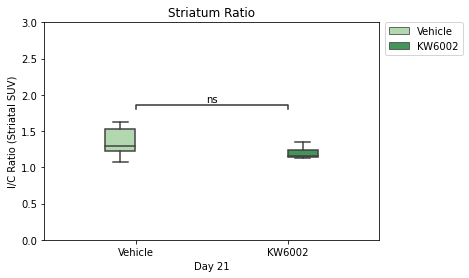

In [15]:
bx = sns.boxplot(x='Group_d21',y='ratio_21',data = pbr28, palette='Greens', width = .4, hue = 'Group_d21')
bx.set(ylim=(0,3))
bx.set(xlabel='Day 21', ylabel='I/C Ratio (Striatal SUV)')
bx.set_title('Striatum Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='Group_d21',y='ratio_21',data = pbr28, box_pairs=[('Vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
plt.savefig('pbr28_d21.png',bbox_inches = 'tight')

In [17]:
pbr28.groupby(['Group_d21'])['ratio_21'].agg(['mean','std'])

,mean,std
Group_d21,,
KW6002,1.196692,0.082532
Vehicle,1.353183,0.206775


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=7.654e-03 stat=3.256e+00


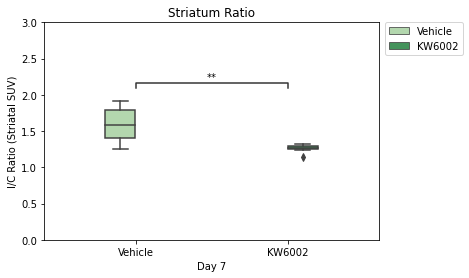

In [18]:
bx = sns.boxplot(x='Group_d7',y='Ratio',data = pbr28, palette='Greens', width = .4, hue = 'Group_d7')
bx.set(ylim=(0,3))
bx.set(xlabel='Day 7', ylabel='I/C Ratio (Striatal SUV)')
bx.set_title('Striatum Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='Group_d7',y='Ratio',data = pbr28, box_pairs=[('Vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
plt.savefig('pbr28_d07.png',bbox_inches = 'tight')

In [19]:
pbr28.groupby(['Group_d7'])['Ratio'].agg(['mean','std'])

,mean,std
Group_d7,,
KW6002,1.259088,0.058487
Vehicle,1.591562,0.264591


In [47]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'striatum_group')

In [48]:
pbr28

,Group,time,SL,SR,Ratio
0,Vehicle,Day 7,0.399617,0.741743,1.856137
1,Vehicle,Day 7,0.391154,0.749996,1.917392
2,Vehicle,Day 7,0.270607,0.419158,1.548956
3,Vehicle,Day 7,0.356515,0.446541,1.252517
4,Vehicle,Day 7,0.293043,0.396865,1.354292
5,Vehicle,Day 7,0.313197,0.507404,1.620078
6,KW6002,Day 7,0.289606,0.375730,1.297383
7,KW6002,Day 7,0.357898,0.450595,1.259002
8,KW6002,Day 7,0.379306,0.479595,1.264401
9,KW6002,Day 7,0.327849,0.374423,1.142058


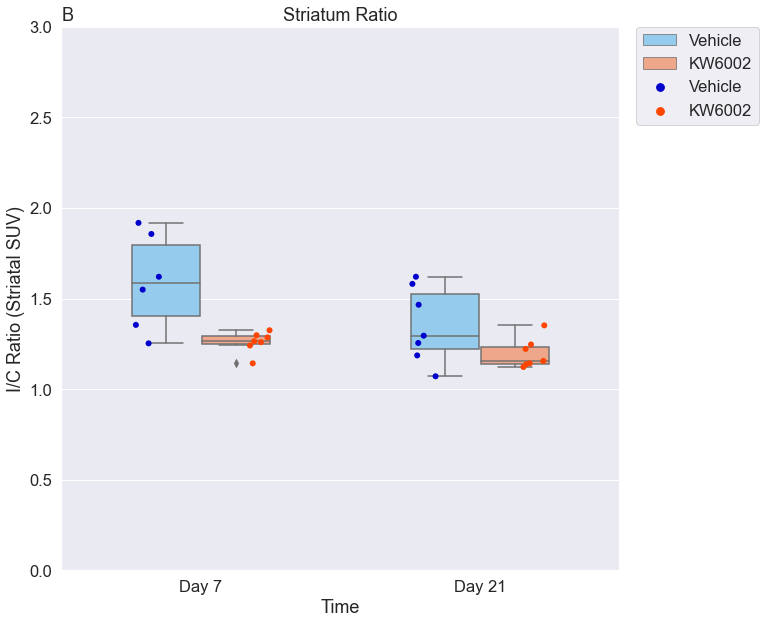

In [65]:
bx = sns.boxplot(x='time', y='Ratio' , hue='Group',data=pbr28, palette = {'Vehicle':'lightskyblue','KW6002':'lightsalmon'}, width = 0.5)
bx = sns.stripplot(x='time', y='Ratio' , hue='Group',data=pbr28, palette = {'Vehicle':'mediumblue','KW6002':'orangered'}, size = 6,  dodge =True)
bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.title('Striatum Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylim(0,3)
plt.ylabel('I/C Ratio (Striatal SUV)')
plt.xlabel('Time') 
plt.title('B', loc='left')
plt.savefig('pbr28_higher.png',dpi = 600, bbox_inches = 'tight')

In [4]:
with Image.open('pbr28.png') as img:
    width, height = img.size
    print(f"Width: {width}, Height: {height}")

Width: 766, Height: 624


In [74]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'striatum_group2')

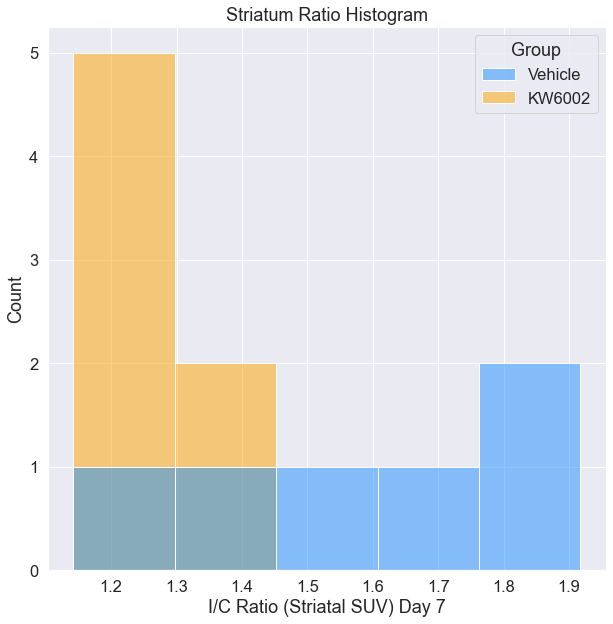

In [78]:
bx = sns.histplot(x='Ratio', hue = 'Group', data=pbr28, palette = {'Vehicle':'dodgerblue','KW6002':'orange'}, element = 'bars')
bx.set_title('Striatum Ratio Histogram')
bx.set(xlabel='I/C Ratio (Striatal SUV) Day 7')
plt.savefig('pbr28_histogram.png',bbox_inches = 'tight')

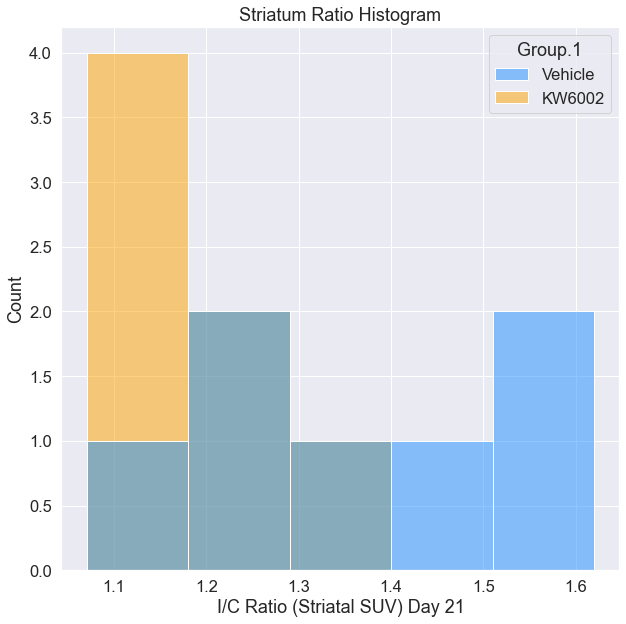

In [79]:
bx = sns.histplot(x='Ratio.1', hue = 'Group.1', data=pbr28, palette = {'Vehicle':'dodgerblue','KW6002':'orange'}, element = 'bars')
bx.set_title('Striatum Ratio Histogram')
bx.set(xlabel='I/C Ratio (Striatal SUV) Day 21')
plt.savefig('pbr28_histogram_d21.png',bbox_inches = 'tight')

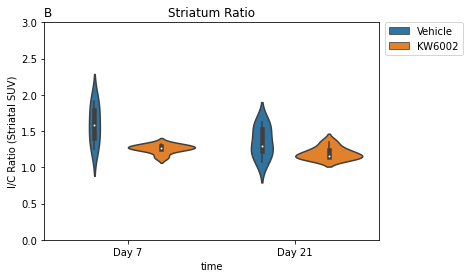

In [51]:
bx = sns.violinplot(x='time', y='Ratio' , hue='Group',data=pbr28, palette = "tab10")
bx.set(ylim=(0,3))
bx.set(ylabel='I/C Ratio (Striatal SUV)')
bx.set_title('Striatum Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.title('B', loc='left')
plt.savefig('pbr28_violin.png',bbox_inches = 'tight')

In [149]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'caudate_putamen')

In [150]:
pbr28

,Group_d7,SL,SR,ratio_7,Unnamed: 4,Group_d21,SL.1,SR.1,ratio_21,Unnamed: 9,Unnamed: 10,group,time,SL.2,SR.2,ratio
0,Vehicle,0.389048,0.845608,2.173532,NaN,Vehicle,0.439655,0.695466,1.581844,NaN,NaN,Vehicle,Day 7,0.389048,0.845608,2.173532
1,Vehicle,0.380076,0.785957,2.067892,NaN,Vehicle,0.311225,0.515215,1.655441,NaN,NaN,Vehicle,Day 7,0.380076,0.785957,2.067892
2,Vehicle,0.255975,0.576237,2.251148,NaN,Vehicle,0.381621,0.552612,1.448065,NaN,NaN,Vehicle,Day 7,0.255975,0.576237,2.251148
3,Vehicle,0.349570,0.547608,1.566522,NaN,Vehicle,0.367199,0.417915,1.138117,NaN,NaN,Vehicle,Day 7,0.349570,0.547608,1.566522
4,Vehicle,0.285437,0.501834,1.758123,NaN,Vehicle,0.353516,0.563133,1.592951,NaN,NaN,Vehicle,Day 7,0.285437,0.501834,1.758123
5,Vehicle,0.301639,0.733105,2.430405,NaN,Vehicle,0.331175,0.541791,1.635967,NaN,NaN,Vehicle,Day 7,0.301639,0.733105,2.430405
6,KW6002,0.397279,0.565564,1.423593,NaN,Vehicle,0.301639,0.733105,2.430405,NaN,NaN,KW6002,Day 7,0.397279,0.565564,1.423593
7,KW6002,0.348124,0.563612,1.618999,NaN,KW6002,0.384162,0.587184,1.528479,NaN,NaN,KW6002,Day 7,0.348124,0.563612,1.618999
8,KW6002,0.365593,0.587560,1.607143,NaN,KW6002,0.392357,0.607593,1.548572,NaN,NaN,KW6002,Day 7,0.365593,0.587560,1.607143
9,KW6002,0.313173,0.430604,1.374969,NaN,KW6002,0.433313,0.555158,1.281193,NaN,NaN,KW6002,Day 7,0.313173,0.430604,1.374969


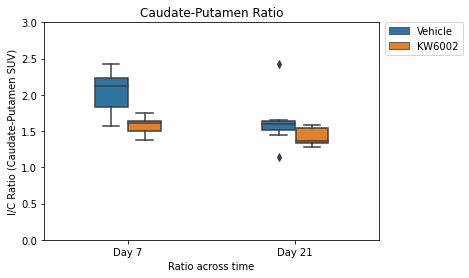

In [151]:
bx = sns.boxplot(x='time',y='ratio',data = pbr28, palette='Greens', width = .4, hue = 'group')
bx.set(ylim=(0,3))
bx.set(xlabel='Ratio across time', ylabel='I/C Ratio (Caudate-Putamen SUV)')
bx.set_title('Caudate-Putamen Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

In [138]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'caudate_putamen')

In [139]:
pbr28

,Group_d7,SL,SR,ratio_7,Unnamed: 4,Group_d21,SL.1,SR.1,ratio_21,Unnamed: 9,group,group_2,time,SL.2,SR.2,ratio
0,Vehicle,0.389048,0.845608,2.173532,NaN,Vehicle,0.439655,0.695466,1.581844,NaN,Vehicle,Vehicle,Day 7,0.389048,0.845608,2.173532
1,Vehicle,0.380076,0.785957,2.067892,NaN,Vehicle,0.311225,0.515215,1.655441,NaN,Vehicle,Vehicle,Day 7,0.380076,0.785957,2.067892
2,Vehicle,0.255975,0.576237,2.251148,NaN,Vehicle,0.381621,0.552612,1.448065,NaN,Vehicle,Vehicle,Day 7,0.255975,0.576237,2.251148
3,Vehicle,0.349570,0.547608,1.566522,NaN,Vehicle,0.367199,0.417915,1.138117,NaN,Vehicle,Vehicle,Day 7,0.349570,0.547608,1.566522
4,Vehicle,0.285437,0.501834,1.758123,NaN,Vehicle,0.353516,0.563133,1.592951,NaN,Vehicle,Vehicle,Day 7,0.285437,0.501834,1.758123
5,Vehicle,0.301639,0.733105,2.430405,NaN,Vehicle,0.331175,0.541791,1.635967,NaN,Vehicle,Vehicle,Day 7,0.301639,0.733105,2.430405
6,KW6002,0.397279,0.565564,1.423593,NaN,Vehicle,0.301639,0.733105,2.430405,NaN,KW6002,KW6002,Day 7,0.397279,0.565564,1.423593
7,KW6002,0.348124,0.563612,1.618999,NaN,KW6002,0.384162,0.587184,1.528479,NaN,KW6002,KW6002,Day 7,0.348124,0.563612,1.618999
8,KW6002,0.365593,0.587560,1.607143,NaN,KW6002,0.392357,0.607593,1.548572,NaN,KW6002,KW6002,Day 7,0.365593,0.587560,1.607143
9,KW6002,0.313173,0.430604,1.374969,NaN,KW6002,0.433313,0.555158,1.281193,NaN,KW6002,KW6002,Day 7,0.313173,0.430604,1.374969


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=4.525e-03 stat=3.553e+00


(<AxesSubplot:title={'center':'Caudate-Putamen Ratio'}, xlabel='Day 7', ylabel='I/C Ratio (Caudate-Putamen SUV)'>,
 [<statannot.StatResult.StatResult at 0x20db5fd62e0>])

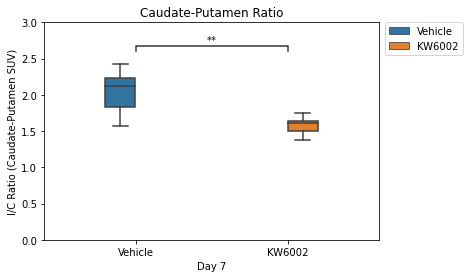

In [140]:
bx = sns.boxplot(x='Group_d7',y='ratio_7',data = pbr28, palette='tab10', width = .4, hue = 'Group_d7')
bx.set(ylim=(0,3))
bx.set(xlabel='Day 7', ylabel='I/C Ratio (Caudate-Putamen SUV)')
bx.set_title('Caudate-Putamen Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
add_stat_annotation(bx, x='Group_d7',y='ratio',data = pbr28, box_pairs=[('Vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=3.220e-02 stat=2.422e+00


(<AxesSubplot:title={'center':'Caudate-Putamen Ratio'}, xlabel='Day 21', ylabel='I/C Ratio (Caudate-Putamen SUV)'>,
 [<statannot.StatResult.StatResult at 0x20db2390940>])

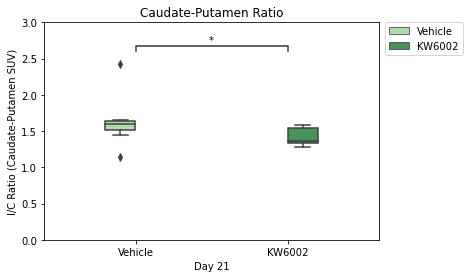

In [59]:
bx = sns.boxplot(x='Group_d21',y='ratio_21',data = pbr28, palette='Greens', width = .4, hue = 'Group_d21')
bx.set(ylim=(0,3))
bx.set(xlabel='Day 21', ylabel='I/C Ratio (Caudate-Putamen SUV)')
bx.set_title('Caudate-Putamen Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='Group_d21',y='ratio',data = pbr28, box_pairs=[('Vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



AttributeError: 'FacetGrid' object has no attribute 'get_ylim'

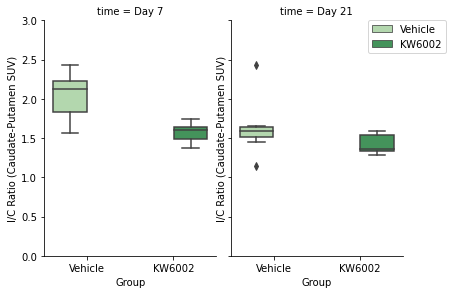

In [56]:
bx = sns.catplot(x='group_2', y='ratio' , hue='group_2', col='time',
                data=pbr28, kind="box",
                height=4, aspect=.7, palette = 'Greens');
bx.set(ylim=(0,3))
bx.set(xlabel='Group', ylabel='I/C Ratio (Caudate-Putamen SUV)')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='group_2',y='ratio', data = pbr28, box_pairs=[('Vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

In [2]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'iba1')

In [3]:
pbr28

,group,region,values,Unnamed: 3,values_2,Unnamed: 5,Unnamed: 6,group.1,region.1,values.1
0,Vehicle,SL_d7,59,NaN,64.666667,NaN,NaN,Vehicle,SL_d7,64.666667
1,Vehicle,SL_d7,78,NaN,NaN,NaN,NaN,Vehicle,SL_d7,67.000000
2,Vehicle,SL_d7,57,NaN,NaN,NaN,NaN,Vehicle,SL_d7,73.000000
3,Vehicle,SL_d7,48,NaN,67.000000,NaN,NaN,KW6002,SL_d7,55.666667
4,Vehicle,SL_d7,62,NaN,NaN,NaN,NaN,KW6002,SL_d7,61.000000
...,...,...,...,...,...,...,...,...,...,...
79,KW6002,SR_d22,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,KW6002,SR_d22,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,KW6002,SR_d22,35,NaN,43.000000,NaN,NaN,NaN,NaN,NaN
82,KW6002,SR_d22,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pbr28.groupby(['region','group'])['values'].agg(['mean','std'])

mean        std
region group                         
SL_d22 KW6002    50.666667  16.422453
       Vehicle   61.555556  15.953927
SL_d7  KW6002    50.750000  16.382502
       Vehicle   68.222222  17.419657
SR_d22 KW6002    69.750000  24.998636
       Vehicle  109.777778  36.251820
SR_d7  KW6002    69.583333  18.807437
       Vehicle  109.111111  30.308598

In [13]:
pbr28.groupby(['region.1','group.1'])['values.1'].agg(['mean','std'])

mean        std
region.1 group.1                       
SL_d22   KW6002    50.666667  11.401754
         Vehicle   61.555556  16.694421
SL_d7    KW6002    50.750000   9.048736
         Vehicle   68.222222   4.299009
SR_d22   KW6002    69.750000  22.268355
         Vehicle  109.777778  15.453634
SR_d7    KW6002    69.583333  10.836752
         Vehicle  109.111111   6.735753

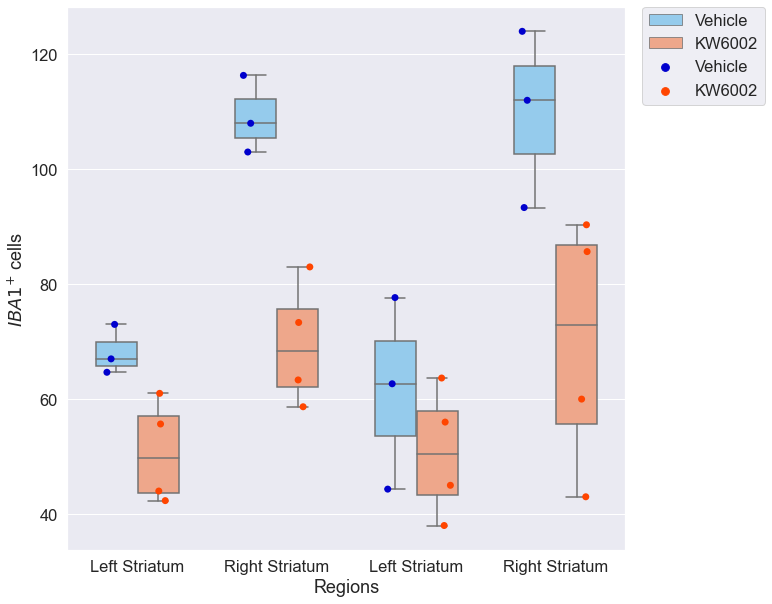

In [8]:
bx = sns.boxplot(x='region.1',y='values.1', data=pbr28, palette={'Vehicle':'lightskyblue','KW6002':'lightsalmon'}, width = 0.6, hue= 'group.1')
bx = sns.stripplot(x='region.1',y='values.1', data=pbr28, palette={'Vehicle':'mediumblue','KW6002':'orangered'}, hue= 'group.1', size = 7, dodge =True)
bx.set_xticklabels(['Left Striatum','Right Striatum','Left Striatum','Right Striatum'])
bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.legend(loc='upper left',prop={'size': 8})
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylim=(0,150)
plt.ylabel('${IBA1^{+}}$ cells')
plt.xlabel('Regions')
plt.savefig('iba-1_alldays_higher',dpi = 600, bbox_inches = 'tight')

In [ ]:
#add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SL_d7','Vehicle'),('SL_d7','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SR_d7','Vehicle'),('SR_d7','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SL_d7','Vehicle'),('SR_d7','Vehicle'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SL_d7','KW6002'),('SR_d7','KW6002'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SL_d22','Vehicle'),('SL_d22','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SR_d22','Vehicle'),('SR_d22','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SL_d22','Vehicle'),('SR_d22','Vehicle'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region.1', y='values.1', hue='group.1', data=pbr28, box_pairs=[(('SL_d22','KW6002'),('SR_d22','KW6002'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)

In [8]:
with Image.open('iba-1_alldays_2.png') as img:
    width, height = img.size
    print(f"Width: {width}, Height: {height}")

Width: 772, Height: 650


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SL_d7_Vehicle v.s. SL_d7_KW6002: t-test independent samples with Bonferroni correction, P_val=2.944e-02 stat=2.355e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SR_d7_Vehicle v.s. SR_d7_KW6002: t-test independent samples with Bonferroni correction, P_val=1.571e-03 stat=3.686e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SL_d7_Vehicle v.s. SR_d7_Vehicle: t-test paired samples with Bonferroni correction, P_val=1.840e-04 stat=-6.521e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 

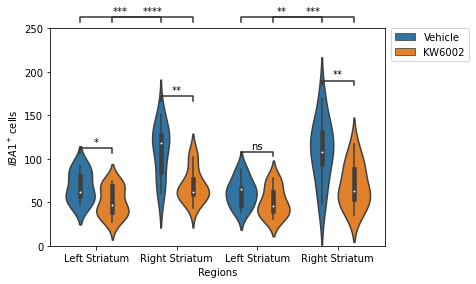

In [48]:
bx = sns.violinplot(x='region',y='values', data=pbr28, palette="tab10", hue= 'group')
bx.set(ylim=(0,250))
bx.set(ylabel='${IBA1^{+}}$ cells')
bx.set(xlabel='Regions')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
bx.set_xticklabels(['Left Striatum','Right Striatum','Left Striatum','Right Striatum'])
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d7','Vehicle'),('SL_d7','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SR_d7','Vehicle'),('SR_d7','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d7','Vehicle'),('SR_d7','Vehicle'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d7','KW6002'),('SR_d7','KW6002'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d22','Vehicle'),('SL_d22','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SR_d22','Vehicle'),('SR_d22','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d22','Vehicle'),('SR_d22','Vehicle'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d22','KW6002'),('SR_d22','KW6002'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
plt.savefig('iba-1_alldays_violin',bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SL_d7_Vehicle v.s. SL_d7_KW6002: t-test independent samples with Bonferroni correction, P_val=2.944e-02 stat=2.355e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SR_d7_Vehicle v.s. SR_d7_KW6002: t-test independent samples with Bonferroni correction, P_val=1.571e-03 stat=3.686e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SL_d7_Vehicle v.s. SR_d7_Vehicle: t-test paired samples with Bonferroni correction, P_val=1.840e-04 stat=-6.521e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 

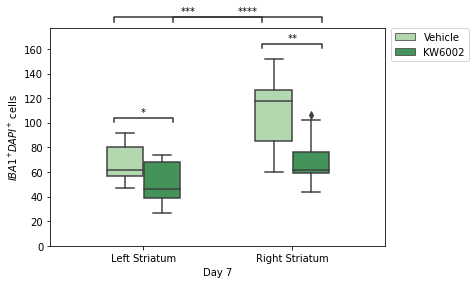

In [66]:
bx = sns.boxplot(x='region',y='values', data=pbr28, palette='Greens', width = 0.5, hue= 'group')
bx.set(ylim=(0,150))
bx.set(xlabel='Day 7')
bx.set(ylabel='${IBA1^{+}}{DAPI^{+}}$ cells')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
bx.set_xticklabels(['Left Striatum','Right Striatum'])
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d7','Vehicle'),('SL_d7','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SR_d7','Vehicle'),('SR_d7','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d7','Vehicle'),('SR_d7','Vehicle'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='region', y='values', hue='group', data=pbr28, box_pairs=[(('SL_d7','KW6002'),('SR_d7','KW6002'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
plt.savefig('Day 7 Iba1',bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SL_d22_Vehicle v.s. SL_d22_KW6002: t-test independent samples with Bonferroni correction, P_val=1.445e-01 stat=1.522e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SR_d22_Vehicle v.s. SR_d22_KW6002: t-test independent samples with Bonferroni correction, P_val=7.351e-03 stat=3.001e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SL_d22_Vehicle v.s. SR_d22_Vehicle: t-test paired samples with Bonferroni correction, P_val=3.542e-03 stat=-4.078e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****:

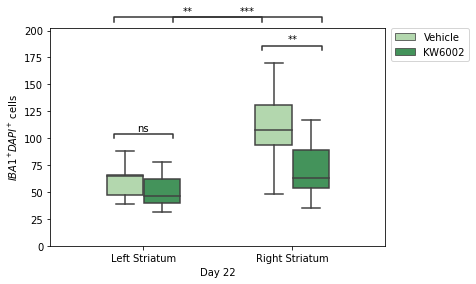

In [67]:
bx = sns.boxplot(x='Region',y='Values', data=pbr28, palette='Greens', width = 0.5, hue= 'Group')
bx.set(ylim=(0,200))
bx.set(xlabel='Day 22')
bx.set(ylabel='${IBA1^{+}}{DAPI^{+}}$ cells')
bx.set_xticklabels(['Left Striatum','Right Striatum'])
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
add_stat_annotation(bx, x='Region', y='Values', hue='Group', data=pbr28, box_pairs=[(('SL_d22','Vehicle'),('SL_d22','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='Region', y='Values', hue='Group', data=pbr28, box_pairs=[(('SR_d22','Vehicle'),('SR_d22','KW6002'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='Region', y='Values', hue='Group', data=pbr28, box_pairs=[(('SL_d22','Vehicle'),('SR_d22','Vehicle'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
add_stat_annotation(bx, x='Region', y='Values', hue='Group', data=pbr28, box_pairs=[(('SL_d22','KW6002'),('SR_d22','KW6002'))], test = 't-test_paired', text_format = 'star',loc='outside', verbose=2)
plt.savefig('Day 22 Iba1',bbox_inches = 'tight')

In [5]:
pbr28.groupby(['Region','Group'])['Values'].agg(['mean','std'])

mean        std
Region Group                         
SL_d22 KW6002    50.666667  16.422453
       Vehicle   61.555556  15.953927
SR_d22 KW6002    69.750000  24.998636
       Vehicle  109.777778  36.251820

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Day 7_Vehicle_D7 v.s. Day 7_KW6002_D7: t-test independent samples with Bonferroni correction, P_val=9.999e-02 stat=1.729e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Day 22_Vehicle_D22 v.s. Day 22_KW6002_D22: t-test independent samples with Bonferroni correction, P_val=5.151e-02 stat=2.078e+00


(<AxesSubplot:xlabel='Time', ylabel='${IBA1^{+}}{DAPI^{+}} [I/C]$ Ratio'>,
 [<statannot.StatResult.StatResult at 0x1fd9b1408b0>])

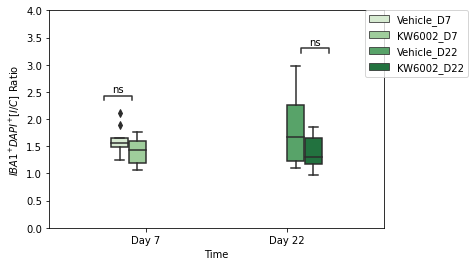

In [34]:
bx = sns.boxplot(x='Time',y='Ratio', data=pbr28, palette='Greens', width = 0.5, hue= 'Animal_Code')
bx.set(ylim=(0,4))
bx.set(ylabel='${IBA1^{+}}{DAPI^{+}} [I/C]$ Ratio')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
add_stat_annotation(bx, x='Time', y='Ratio', hue='Animal_Code', data=pbr28, box_pairs=[(('Day 7','Vehicle_D7'),('Day 7','KW6002_D7'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)
add_stat_annotation(bx, x='Time', y='Ratio', hue='Animal_Code', data=pbr28, box_pairs=[(('Day 22','Vehicle_D22'),('Day 22','KW6002_D22'))], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=7.818e-01 stat=2.878e-01


(<AxesSubplot:title={'center':'Left striatum'}, xlabel='Day 22', ylabel='${DAPI^{+}}$/${IBA1^{+}}$ cells'>,
 [<statannot.StatResult.StatResult at 0x20db1ff6700>])

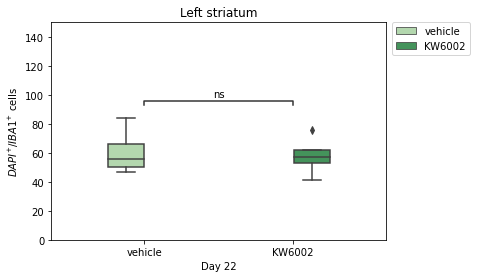

In [92]:
bx = sns.boxplot(x='Group_22',y='d22_ls', data=pbr28, palette='Greens', width = 0.5, hue= 'Group_22')
bx.set(ylim=(0,150))
bx.set(xlabel='Day 22')
bx.set(ylabel='${DAPI^{+}}$/${IBA1^{+}}$ cells')
bx.set_title('Left striatum')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='Group_22', y='d22_ls', data=pbr28, box_pairs=[('vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=2.212e-01 stat=1.343e+00


(<AxesSubplot:title={'center':'Right striatum'}, xlabel='Day 22', ylabel='${DAPI^{+}}$/${IBA1^{+}}$ cells'>,
 [<statannot.StatResult.StatResult at 0x20db203e5e0>])

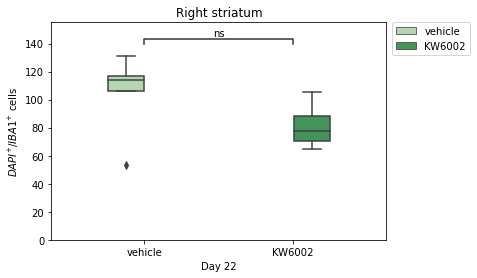

In [93]:
bx = sns.boxplot(x='Group_22',y='d22_rs', data=pbr28, palette='Greens', width = 0.5, hue= 'Group_22')
bx.set(ylim=(0,150))
bx.set(xlabel='Day 22')
bx.set(ylabel='${DAPI^{+}}$/${IBA1^{+}}$ cells')
bx.set_title('Right striatum')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='Group_22', y='d22_rs', data=pbr28, box_pairs=[('vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

vehicle v.s. KW6002: t-test independent samples with Bonferroni correction, P_val=3.078e-01 stat=1.100e+00


(<AxesSubplot:xlabel='Day 22', ylabel='Ratio [Ipsilateral/Contralateral]'>,
 [<statannot.StatResult.StatResult at 0x20db391ed30>])

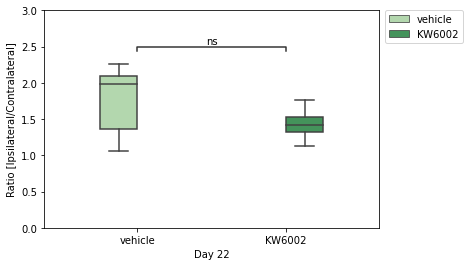

In [94]:
bx = sns.boxplot(x='Group_22',y='ratio_d22', data=pbr28, palette='Greens', width = 0.5, hue= 'Group_22')
bx.set(ylim=(0,3))
bx.set(xlabel='Day 22')
bx.set(ylabel='Ratio [Ipsilateral/Contralateral]')
plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.25, 1),
           borderaxespad=0)
add_stat_annotation(bx, x='Group_22', y='ratio_d22', data=pbr28, box_pairs=[('vehicle','KW6002')], test = 't-test_ind', text_format = 'star',loc='inside', verbose=2)

In [9]:
rotarod = pd.read_excel('Rotarod.xlsx', sheet_name = 'Python')

In [10]:
rotarod

,Unnamed: 0,Time,Values,Group,Unnamed: 4,Time_1,Values_1,Group_1,Unnamed: 8,Time_2,Values_2,Group_2
0,NaN,Baseline,13.15,Vehicle,NaN,Baseline,41.67,Vehicle,NaN,Baseline,17.216667,Vehicle
1,NaN,Baseline,22.21,Vehicle,NaN,Baseline,57.00,Vehicle,NaN,Baseline,21.723333,Vehicle
2,NaN,Baseline,28.28,Vehicle,NaN,Baseline,66.67,Vehicle,NaN,Baseline,24.490000,Vehicle
3,NaN,Baseline,23.05,Vehicle,NaN,Baseline,59.00,Vehicle,NaN,Baseline,22.233333,Vehicle
4,NaN,Baseline,10.76,Vehicle,NaN,Baseline,36.33,Vehicle,NaN,Baseline,15.593333,Vehicle
5,NaN,Baseline,18.77,Vehicle,NaN,Baseline,52.00,Vehicle,NaN,Baseline,20.186667,Vehicle
6,NaN,Baseline,24.33,Vehicle,NaN,Baseline,60.67,Vehicle,NaN,Baseline,22.736667,Vehicle
7,NaN,Day 3,7.50,Vehicle,NaN,Day 3,28.33,Vehicle,NaN,Day 3,13.290000,Vehicle
8,NaN,Day 3,8.70,Vehicle,NaN,Day 3,31.33,Vehicle,NaN,Day 3,14.150000,Vehicle
9,NaN,Day 3,12.85,Vehicle,NaN,Day 3,40.00,Vehicle,NaN,Day 3,16.773333,Vehicle


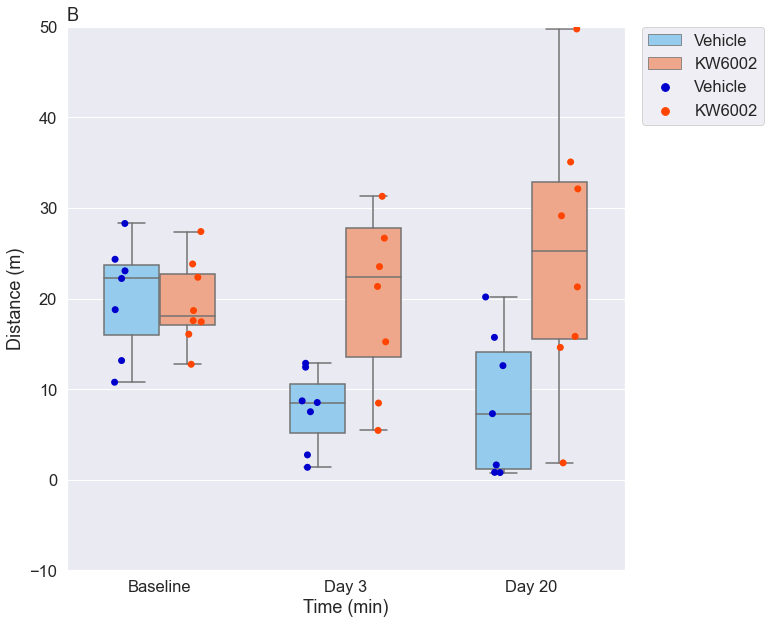

In [19]:
bx = sns.boxplot(data=rotarod, x='Time', y='Values', hue='Group', palette = {'Vehicle':'lightskyblue','KW6002':'lightsalmon'}, width = 0.6)
bx = sns.stripplot(data=rotarod, x='Time', y='Values', hue='Group', palette = {'Vehicle':'mediumblue','KW6002':'orangered'}, size= 7, marker='o', linestyle='-', dodge =True)
bx.set_ylim(-10, 50)

bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.legend(loc='upper left',prop={'size': 8})
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylabel('Distance (m)')
plt.xlabel("Time (min)")
plt.title('B', loc='left')
plt.savefig('rotarod_dist_3_higher',dpi= 600, bbox_inches = 'tight')

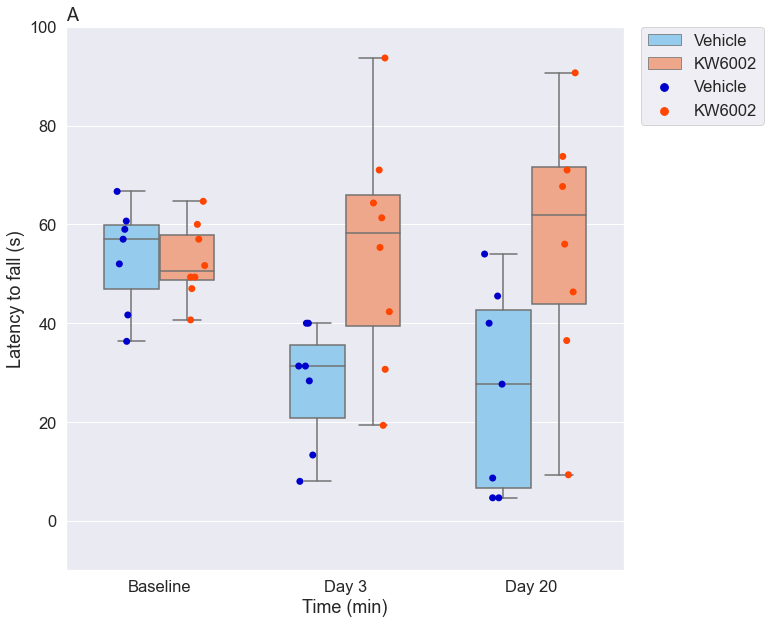

In [26]:
bx= sns.boxplot(data=rotarod, x='Time_1', y='Values_1', hue='Group_1', palette = {'Vehicle':'lightskyblue','KW6002':'lightsalmon'}, width = 0.6)
bx = sns.stripplot(data=rotarod, x='Time_1', y='Values_1', hue='Group_1', palette = {'Vehicle':'mediumblue','KW6002':'orangered'}, size= 7, marker='o', linestyle='-', dodge =True)
bx.set_ylim(-10, 100)
bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.legend(loc='upper left',prop={'size': 8})
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylabel('Latency to fall (s)')
plt.xlabel("Time (min)")
plt.title('A', loc='left')
plt.savefig('rotarod_sec_2_higher', dpi =600, bbox_inches = 'tight')

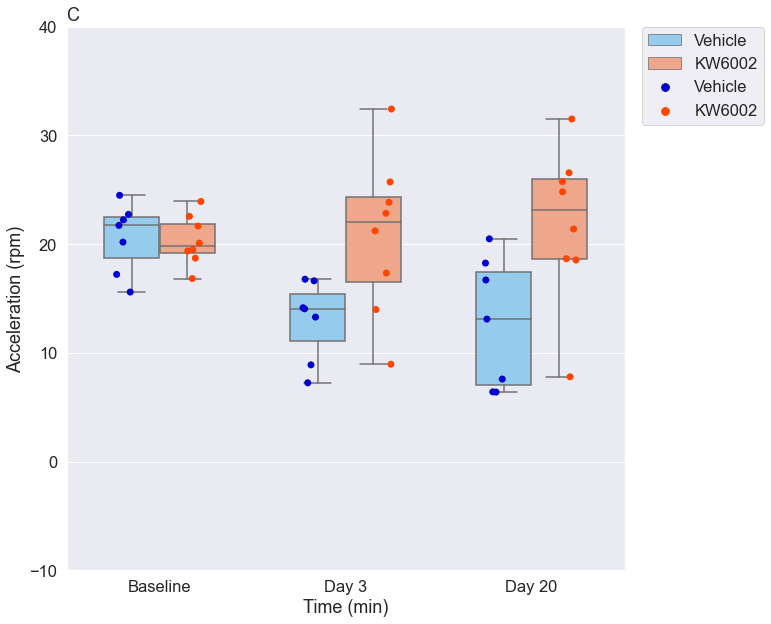

In [21]:
bx= sns.boxplot(data=rotarod, x='Time_2', y='Values_2', hue='Group_2', palette = {'Vehicle':'lightskyblue','KW6002':'lightsalmon'}, width = 0.6)
bx = sns.stripplot(data=rotarod, x='Time_2', y='Values_2', hue='Group_2', palette = {'Vehicle':'mediumblue','KW6002':'orangered'}, size= 7, marker='o', linestyle='-', dodge =True)
bx.set_ylim(-10, 40)
bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.legend(loc='upper left',prop={'size': 8})
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylabel('Acceleration (rpm)')
plt.xlabel("Time (min)")
plt.title('C', loc='left')
plt.savefig('rotarod_rpm_2_higher', dpi=600, bbox_inches = 'tight')

In [53]:
cylinder = pd.read_excel('Rotarod.xlsx', sheet_name = 'Cyl_test')

In [54]:
cylinder

,Time,Group,Values,Values.1,Unnamed: 4,Unnamed: 5
0,Baseline,Vehicle,49.20635,49.20635,NaN,NaN
1,Baseline,Vehicle,50.00000,50.00000,NaN,NaN
2,Baseline,Vehicle,42.30769,42.30769,NaN,NaN
3,Baseline,Vehicle,54.76190,54.76190,NaN,NaN
4,Baseline,Vehicle,51.85185,51.85185,NaN,NaN
...,...,...,...,...,...,...
75,Day 19,KW6002,31.03450,31.03450,NaN,NaN
76,Day 19,KW6002,44.11760,44.11760,NaN,NaN
77,Day 19,KW6002,45.83330,45.83330,NaN,NaN
78,Day 19,KW6002,28.57140,28.57140,NaN,NaN


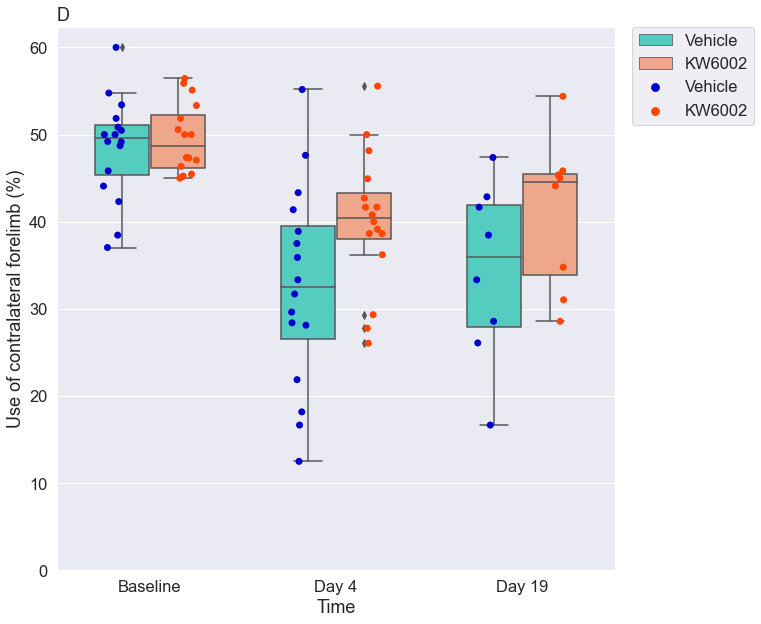

In [55]:
bx= sns.boxplot(data=cylinder, x='Time', y='Values', hue='Group', palette = {'Vehicle':'turquoise','KW6002':'lightsalmon'}, width = 0.6)
bx = sns.stripplot(data=cylinder, x='Time', y='Values', hue='Group', palette = {'Vehicle':'mediumblue','KW6002':'orangered'}, marker='o', size =7, linestyle='-', dodge =True)
bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.legend(loc='upper left',prop={'size': 8})
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylim(0, None)
plt.ylabel('Use of contralateral forelimb (%)')
plt.title('D', loc='left')
plt.savefig('Cylinder_2',bbox_inches = 'tight')

In [22]:
cylinder = pd.read_excel('Rotarod.xlsx', sheet_name = 'Cyl_test_2')

In [23]:
cylinder

,Time,Group,Values,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Baseline,Vehicle,47.368420,NaN,NaN,NaN,NaN
1,Baseline,Vehicle,55.882350,NaN,NaN,NaN,NaN
2,Baseline,Vehicle,46.341460,NaN,NaN,NaN,NaN
3,Baseline,Vehicle,50.000000,NaN,NaN,NaN,NaN
4,Baseline,Vehicle,56.435640,NaN,NaN,NaN,NaN
5,Baseline,Vehicle,45.161290,NaN,NaN,NaN,NaN
6,Baseline,Vehicle,45.238100,NaN,NaN,NaN,NaN
7,Baseline,Vehicle,47.321430,NaN,NaN,NaN,NaN
8,Baseline,KW6002,50.574713,NaN,NaN,NaN,NaN
9,Baseline,KW6002,47.058824,NaN,NaN,NaN,NaN


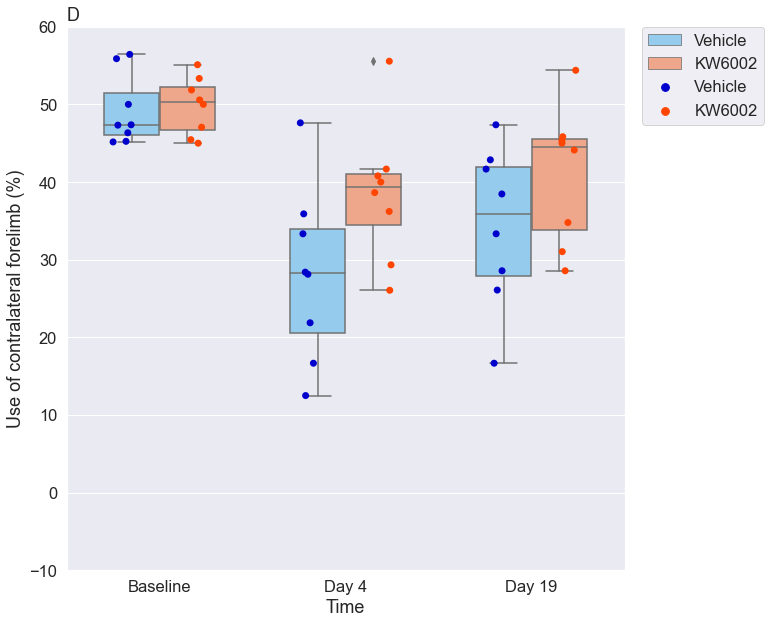

In [25]:
bx= sns.boxplot(data=cylinder, x='Time', y='Values', hue='Group', palette = {'Vehicle':'lightskyblue','KW6002':'lightsalmon'}, width = 0.6)
bx = sns.stripplot(data=cylinder, x='Time', y='Values', hue='Group', palette = {'Vehicle':'mediumblue','KW6002':'orangered'}, size = 7, marker='o', linestyle='-', dodge =True)
bx.set_ylim(-10, 60)
bx = sns.set(rc={'figure.figsize':(10,10)})
bx = sns.set(font_scale = 1.5)
plt.legend(loc='upper left',prop={'size': 8})
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.ylabel('Use of contralateral forelimb (%)')
plt.title('D', loc='left')
plt.savefig('Cylinder_C_higher',dpi = 600, bbox_inches = 'tight')

In [11]:
cylinder.groupby(['Time','Group'])['Values'].agg(['mean','std'])

mean        std
Time     Group                        
Baseline KW6002   49.507750   4.007739
         Vehicle  48.509309   5.880994
Day 19   KW6002   41.135775   8.779617
         Vehicle  34.376519  10.195848
Day 4    KW6002   40.077760   7.841749
         Vehicle  32.512766  11.634240

In [35]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'scan1')

In [36]:
pbr28

,Time (min),Group,SUV,Unnamed: 3,Time (min).1,Group.1,SUV.1,Unnamed: 7,Time (min).2,Group.2,SUV.2,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,0.083333,Vehicle,0.012343,NaN,0.083333,Vehicle,0.013391,NaN,0.083333,Vehicle,0.023926,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.250000,Vehicle,0.089159,NaN,0.250000,Vehicle,0.087841,NaN,0.250000,Vehicle,0.129738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.416667,Vehicle,0.263625,NaN,0.416667,Vehicle,0.218094,NaN,0.416667,Vehicle,0.390475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.583333,Vehicle,0.577935,NaN,0.583333,Vehicle,0.445830,NaN,0.583333,Vehicle,0.612241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.750000,Vehicle,0.575184,NaN,0.750000,Vehicle,0.778268,NaN,0.750000,Vehicle,0.868594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,22.500000,KW6002,0.454064,NaN,22.500000,KW6002,0.535497,NaN,22.500000,KW6002,0.590258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,27.500000,KW6002,0.336108,NaN,27.500000,KW6002,0.448874,NaN,27.500000,KW6002,0.581990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,35.000000,KW6002,0.341019,NaN,35.000000,KW6002,0.419338,NaN,35.000000,KW6002,0.516037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,45.000000,KW6002,0.341013,NaN,45.000000,KW6002,0.413786,NaN,45.000000,KW6002,0.466491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


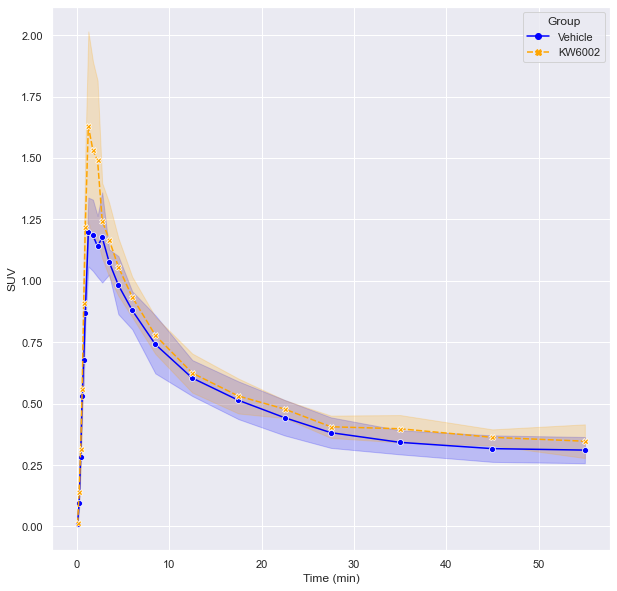

In [30]:
ax = sns.lineplot(data=pbr28, x='Time (min)', y='SUV', hue='Group', err_style='band', ci='sd', palette = {'Vehicle':'blue','KW6002':'orange'}, style="Group", markers=True)

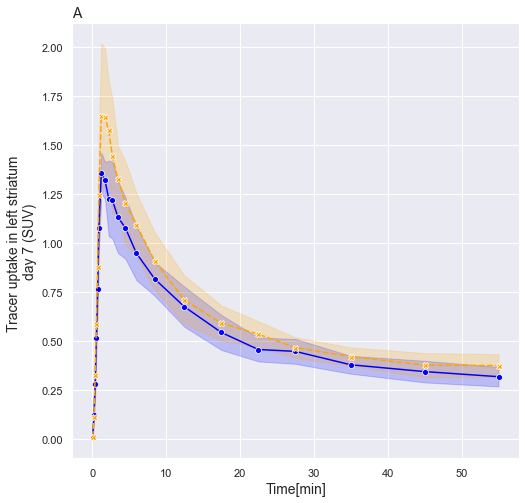

In [66]:
ax = sns.lineplot(data=pbr28, x='Time (min)', y='SUV', hue='Group', err_style='band', ci='sd', palette = {'Vehicle':'blue','KW6002':'orange'}, style="Group", markers=True)
ax.set_xlabel('Time[min]', fontsize=14)
ax.set_ylabel('Tracer uptake in left striatum \nday 7 (SUV)', fontsize=14)
plt.legend([],[], frameon=False)
plt.title('A', loc='left', fontsize=14)
plt.savefig('Scan1_pbr28_higher.png', dpi= 600)

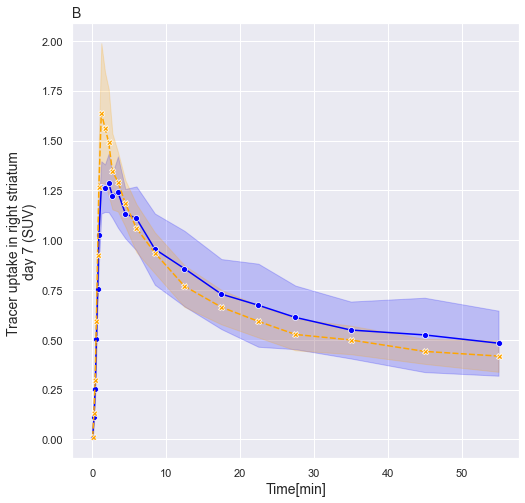

In [58]:
ax = sns.lineplot(data=pbr28, x='Time (min).1', y='SUV.1', hue='Group.1', err_style='band', ci='sd', palette = {'Vehicle':'blue','KW6002':'orange'}, style="Group", markers=True)
ax.set_xlabel('Time[min]',fontsize=14)
ax.grid(True, which='both')
ax.set_ylabel('Tracer uptake in right striatum \nday 7 (SUV)',fontsize=14)
plt.legend([],[], frameon=False)
plt.title('B', loc='left',fontsize=14)
plt.savefig('Scan1_pbr28_RS_higher.png')

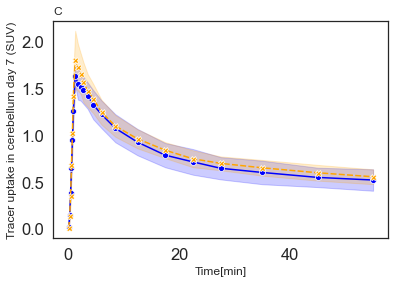

In [65]:
ax = sns.lineplot(data=pbr28, x='Time (min).2', y='SUV.2', hue='Group.2', err_style='band', ci='sd', palette = {'Vehicle':'blue','KW6002':'orange'}, style="Group", markers=True)
ax.set_xlabel('Time[min]',fontsize=12)
ax.set_ylabel('Tracer uptake in cerebellum day 7 (SUV)',fontsize=12)
plt.legend([],[], frameon=False)
plt.title('C', loc='left',fontsize=12)
plt.savefig('Scan1_pbr28_cerebellum.png')

In [67]:
pbr28 = pd.read_excel('pbr28_suv_iba1.xlsx', sheet_name = 'scan2')

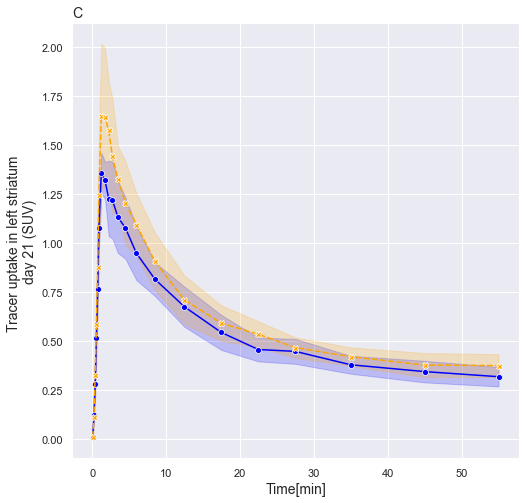

In [68]:
ax = sns.lineplot(data=pbr28, x='Time (min)', y='SUV', hue='Group', err_style='band', ci='sd', palette = {'Vehicle':'blue','KW6002':'orange'}, style="Group", markers=True)
ax.set_xlabel('Time[min]',fontsize=14)
ax.set_ylabel('Tracer uptake in left striatum \nday 21 (SUV)',fontsize=14)
plt.legend([],[], frameon=False)
plt.title('C', loc='left',fontsize=14)
plt.savefig('Scan2_pbr28_LS_higher.png', dpi=600)

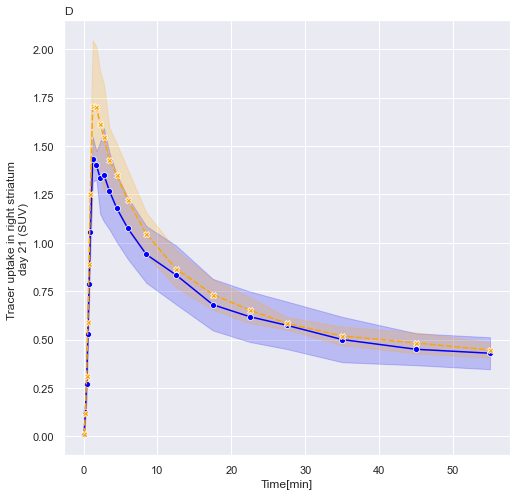

In [69]:
ax = sns.lineplot(data=pbr28, x='Time (min).1', y='SUV.1', hue='Group.1', err_style='band', ci='sd', palette = {'Vehicle':'blue','KW6002':'orange'}, style="Group", markers=True)
ax.set_xlabel('Time[min]',fontsize=12)
ax.set_ylabel('Tracer uptake in right striatum \nday 21 (SUV)',fontsize=12)
plt.legend([],[], frameon=False)
plt.title('D', loc='left',fontsize=12)
plt.savefig('Scan2_pbr28_RS_higher.png', dpi=600)